In [2]:
import pandas as pd
import numpy as np
import pickle
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Charger les données préparées
df_ml = pd.read_csv('../data/processed/data_ml.csv')

# Features et target
feature_cols = ['liaison_encoded', 'service_encoded', 'annee', 'mois', 
                'Durée moyenne du trajet', 'Nombre de circulations prévues']
X = df_ml[feature_cols]
y = df_ml['taux_regularite']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")

Train: 8549 samples
Test: 2138 samples


In [3]:
# Entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Performance du modèle :")
print(f"  MAE  : {mae:.4f} ({mae*100:.2f} points de pourcentage)")
print(f"  RMSE : {rmse:.4f}")
print(f"  R²   : {r2:.4f}")

ValueError: Input y contains NaN.

In [4]:
# Supprimer les lignes avec NaN
df_ml = df_ml.dropna()

# Features et target
feature_cols = ['liaison_encoded', 'service_encoded', 'annee', 'mois', 
                'Durée moyenne du trajet', 'Nombre de circulations prévues']
X = df_ml[feature_cols]
y = df_ml['taux_regularite']

# Split train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Train: {X_train.shape[0]} samples")
print(f"Test: {X_test.shape[0]} samples")


Train: 8491 samples
Test: 2123 samples


In [5]:
# Entraîner le modèle
model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
model.fit(X_train, y_train)

# Prédictions
y_pred = model.predict(X_test)

# Évaluation
mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Performance du modèle :")
print(f"  MAE  : {mae:.4f} ({mae*100:.2f} points de pourcentage)")
print(f"  RMSE : {rmse:.4f}")
print(f"  R²   : {r2:.4f}")

Performance du modèle :
  MAE  : 0.0358 (3.58 points de pourcentage)
  RMSE : 0.0512
  R²   : 0.5216


Importance des features :
                          feature  importance
0                 liaison_encoded    0.234319
4         Durée moyenne du trajet    0.233372
5  Nombre de circulations prévues    0.229638
3                            mois    0.161406
2                           annee    0.128689
1                 service_encoded    0.012577


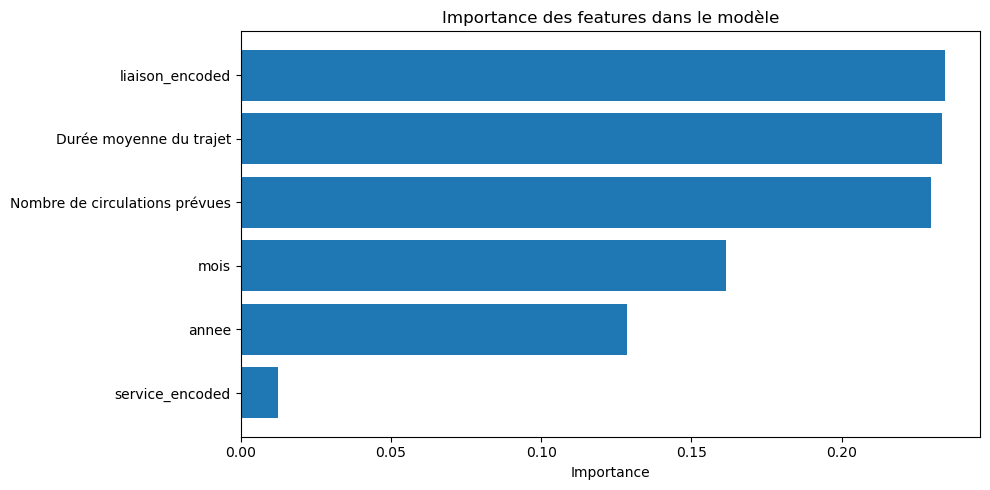

In [6]:
# Importance des features
importance = pd.DataFrame({
    'feature': feature_cols,
    'importance': model.feature_importances_
}).sort_values('importance', ascending=False)

print("Importance des features :")
print(importance)

# Visualisation
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 5))
plt.barh(importance['feature'], importance['importance'])
plt.xlabel('Importance')
plt.title('Importance des features dans le modèle')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [7]:
# Sauvegarder le modèle
pickle.dump(model, open('../data/processed/model.pkl', 'wb'))

# Sauvegarder aussi les informations nécessaires pour l'app
model_info = {
    'feature_cols': feature_cols,
    'liaisons': df_ml['liaison'].unique().tolist(),
    'services': ['National', 'International']
}
pickle.dump(model_info, open('../data/processed/model_info.pkl', 'wb'))

print("Modèle sauvegardé dans data/processed/model.pkl")
print(f"Nombre de liaisons disponibles : {len(model_info['liaisons'])}")

Modèle sauvegardé dans data/processed/model.pkl
Nombre de liaisons disponibles : 130


In [8]:
git add . && git commit -m "Retrain model with sklearn 1.5.2" && git push

SyntaxError: invalid syntax (1083597448.py, line 1)